In [1]:
# Does nothing

from PIL import Image
import os
import numpy as np
import pandas as pd
from torchvision.io import read_image

import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

import torch.nn as nn
import torch.nn.functional as F

from torchvision.transforms.functional import pil_to_tensor

device = "cuda"
torch.cuda.is_available()

True

In [2]:
path = "datasets/"

landsat8_train = path + "landsat8_train/train/"

In [3]:
images = np.array(os.listdir(landsat8_train))
images.sort()

images = np.array_split(images, 9)
images = np.transpose(images)

# [ "SR_B1", "SR_B2", "SR_B3", "SR_B4", "SR_B5", "SR_B6", "SR_B7", "ST_B10", "QA_PIXEL" ]
images[0]

array(['Landsat8_QA_PIXEL_-54.48_-3.33_2013_03_27.tiff',
       'Landsat8_SR_B1_-54.48_-3.33_2013_03_27.tiff',
       'Landsat8_SR_B2_-54.48_-3.33_2013_03_27.tiff',
       'Landsat8_SR_B3_-54.48_-3.33_2013_03_27.tiff',
       'Landsat8_SR_B4_-54.48_-3.33_2013_03_27.tiff',
       'Landsat8_SR_B5_-54.48_-3.33_2013_03_27.tiff',
       'Landsat8_SR_B6_-54.48_-3.33_2013_03_27.tiff',
       'Landsat8_SR_B7_-54.48_-3.33_2013_03_27.tiff',
       'Landsat8_ST_B10_-54.48_-3.33_2013_03_27.tiff'], dtype='<U46')

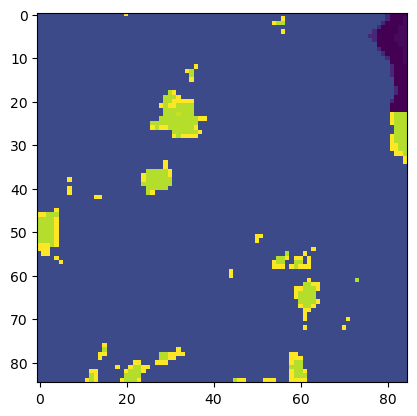

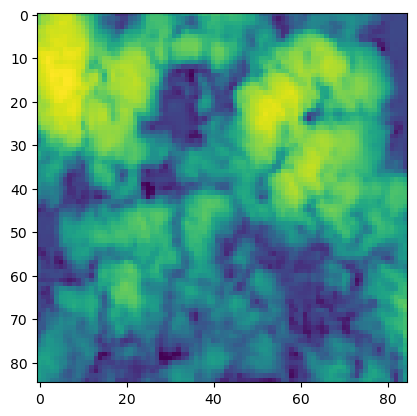

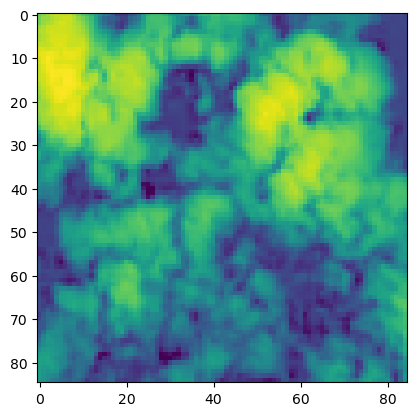

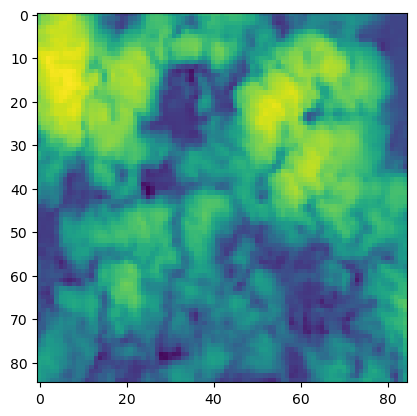

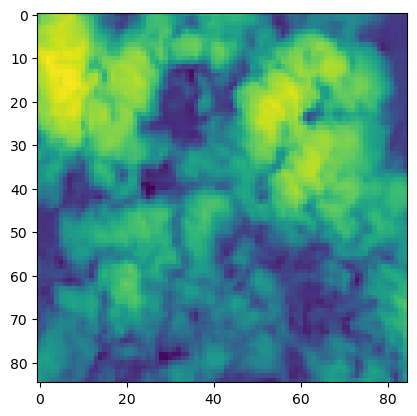

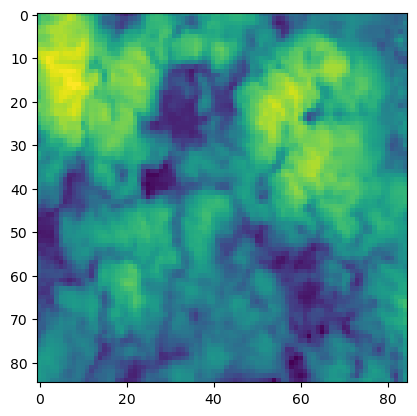

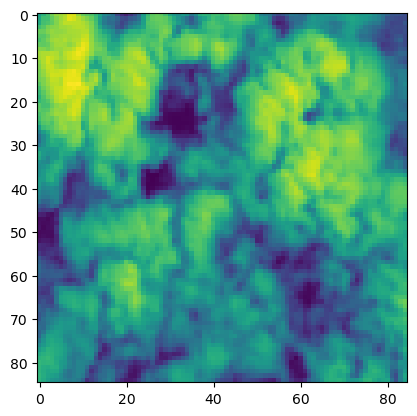

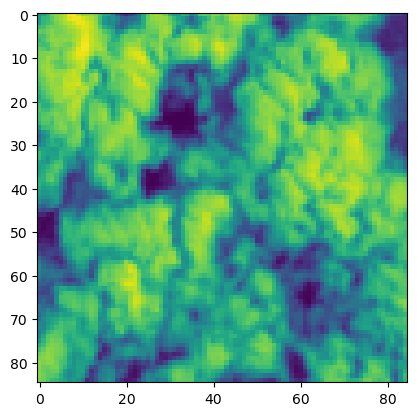

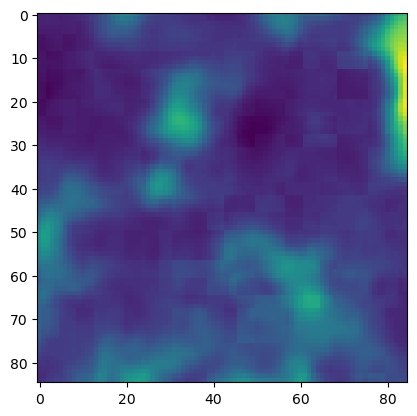

In [4]:
def load_image(img):
    i = Image.open(img)
    i = np.array(i).astype(np.float32)
    i -= i.min()
    if i.max() != 0:
        i /= i.max()
    return torch.from_numpy(i)

def load_labels(img):
    i = Image.open(img)
    i = np.array(i).astype(np.float32)
    return torch.from_numpy(i)    

# sample random image
img = images[0]

for i in img:
    img = load_image(landsat8_train + i)
    plt.imshow(img)
    plt.show()